In [9]:
#creat data
from mxnet import ndarray as nd
from mxnet import autograd
from mxnet import gluon

num_train=100
num_test =100

true_w=[1.2,-3.4,5.6]
true_b=5.0

x = nd.random.normal(shape=(num_train + num_test, 1)) #把200个x输入进去
X=nd.concat(x,nd.power(x,2),nd.power(x,3))#X包含三个阶级的x，所以后面的y才能从X中调用
y = true_w[0] * X[:, 0] + true_w[1] * X[:, 1] + true_w[2] * X[:, 2] + true_b
y += .1 * nd.random.normal(shape=y.shape)

In [18]:

%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 120 #这个是什么？图片的像素是120dpi吗？
import matplotlib.pyplot as plt

#difine function 定义一个一层的神经网络
def train(X_train, X_test,y_train,y_test):
    net=gluon.nn.Sequential()
    with net.name_scope():
        net.add(gluon.nn.Dense(1))
    net.initialize()
    

#setting parameters

    learning_rate=0.01
    epochs=100
    batch_size=min(10,y_train.shape[0])
    
#read date
    dataset_train=gluon.data.ArrayDataset(X_train, y_train)
    data_iter_train = gluon.data.DataLoader(
        dataset_train, batch_size, shuffle=True)
    #SGD and square loss
    trainer=gluon.Trainer(net.collect_params(),'sgd',{'learning_rate':learning_rate})
    square_loss=gluon.loss.L2Loss()
    
#training data
    train_loss=[]
    test_loss=[]
    for e in range(epochs):
        for data,label in data_iter_train:
            with autograd.record():
                output=net(data)
                loss=square_loss(output,label)
        loss.backward()
        trainer.step(batch_size)
        train_loss.append(square_loss(
            net(X_train), y_train).mean().asscalar())
        test_loss.append(square_loss(
            net(X_test), y_test).mean().asscalar())
    
    plt.plot(train_loss)
    plt.plot(test_loss)
    plt.legend(['train','test'])
    plt.show()
    return ('learned weight', net[0].weight.data(),
            'learned bias', net[0].bias.data())



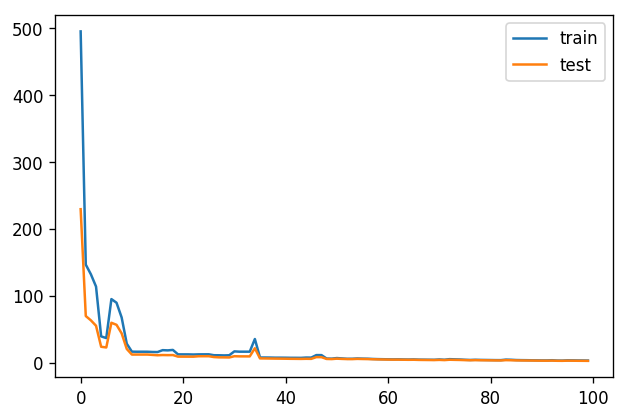

('learned weight', 
 [[ 0.55836171 -2.6658957   5.84887552]]
 <NDArray 1x3 @cpu(0)>, 'learned bias', 
 [ 2.09598422]
 <NDArray 1 @cpu(0)>)

In [19]:

train(X[:num_train, :], X[num_train:, :], y[:num_train], y[num_train:])


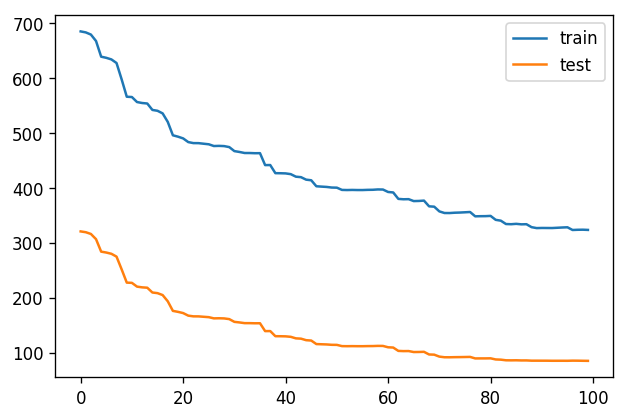

('learned weight', 
 [[ 19.58223152]]
 <NDArray 1x1 @cpu(0)>, 'learned bias', 
 [-0.62155992]
 <NDArray 1 @cpu(0)>)

In [20]:
train(x[:num_train, :], x[num_train:, :], y[:num_train], y[num_train:])

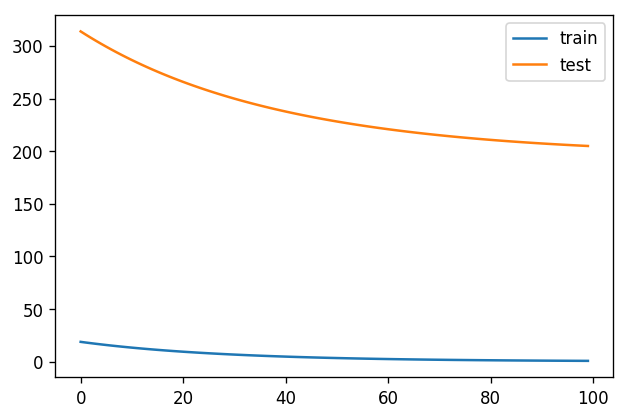

('learned weight', 
 [[ 1.77439547  1.24443018  1.13459718]]
 <NDArray 1x3 @cpu(0)>, 'learned bias', 
 [ 3.02237749]
 <NDArray 1 @cpu(0)>)

In [21]:
train(X[0:2, :], X[num_train:, :], y[0:2], y[num_train:])